In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

In [2]:
train_df = pd.read_csv("train.csv")
building_df = pd.read_csv("building_metadata.csv")
test_df = pd.read_csv("test.csv")
weather_train_df = pd.read_csv('weather_train.csv')
weather_test_df = pd.read_csv('weather_test.csv')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import gc

In [4]:
train = train_df.merge(building_df, on='building_id', how='left')
test = test_df.merge(building_df, on='building_id', how='left')

train = train.merge(weather_train_df, on=['site_id', 'timestamp'], how='left')
test = test.merge(weather_test_df, on=['site_id', 'timestamp'], how='left')
del weather_train_df, weather_test_df,building_df
gc.collect();

In [5]:
d_types = {'building_id': np.int16,
          'meter': np.int8,
          'site_id': np.int8,
          'primary_use': 'category',
          'square_feet': np.int32,
          'year_built': np.float16,
          'floor_count': np.float16,
          'air_temperature': np.float32,
          'cloud_coverage': np.float16,
          'dew_temperature': np.float32,
          'precip_depth_1_hr': np.float16,
          'sea_level_pressure': np.float32,
          'wind_direction': np.float16,
          'wind_speed': np.float32}

for feature in d_types:
    train[feature] = train[feature].astype(d_types[feature])
    test[feature] = test[feature].astype(d_types[feature])
    
train["timestamp"] = pd.to_datetime(train["timestamp"])
test["timestamp"] = pd.to_datetime(test["timestamp"])
gc.collect();

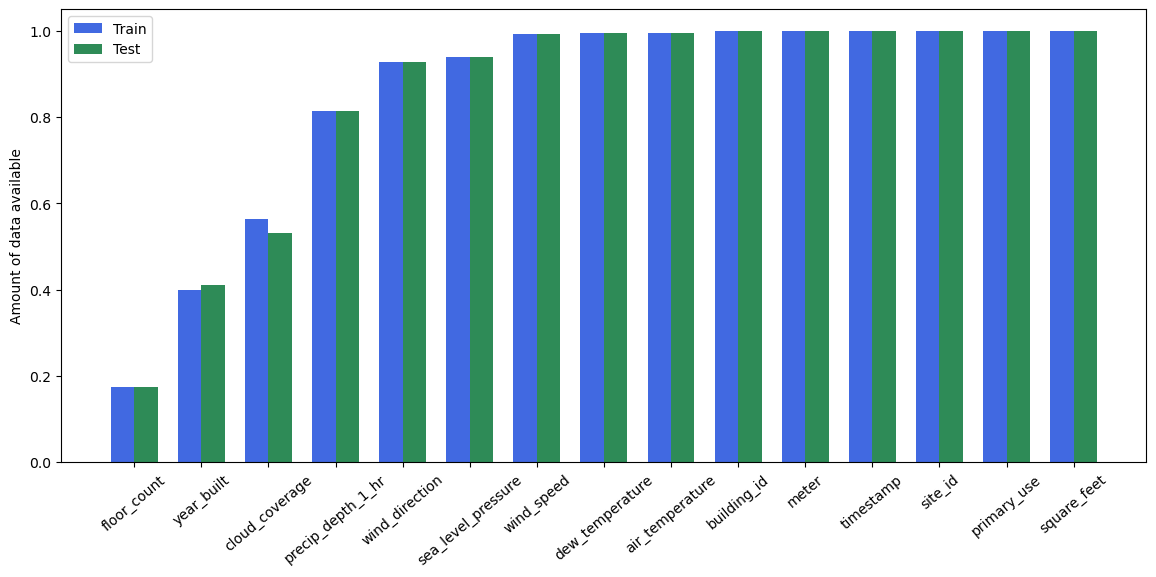

In [6]:
train_data = (train.count() / len(train)).drop('meter_reading').sort_values().values
ind = np.arange(len(train_data))
width = 0.35

fig, axes = plt.subplots(1,1,figsize=(14, 6), dpi=100)
tr = axes.bar(ind, train_data, width, color='royalblue')

test_data = (test.count() / len(test)).drop('row_id').sort_values().values
tt = axes.bar(ind+width, test_data, width, color='seagreen')

axes.set_ylabel('Amount of data available');
axes.set_xticks(ind + width / 2)
axes.set_xticklabels((train.count() / len(train)).drop('meter_reading').sort_values().index, rotation=40)
axes.legend([tr, tt], ['Train', 'Test']);

# Finding outlayer

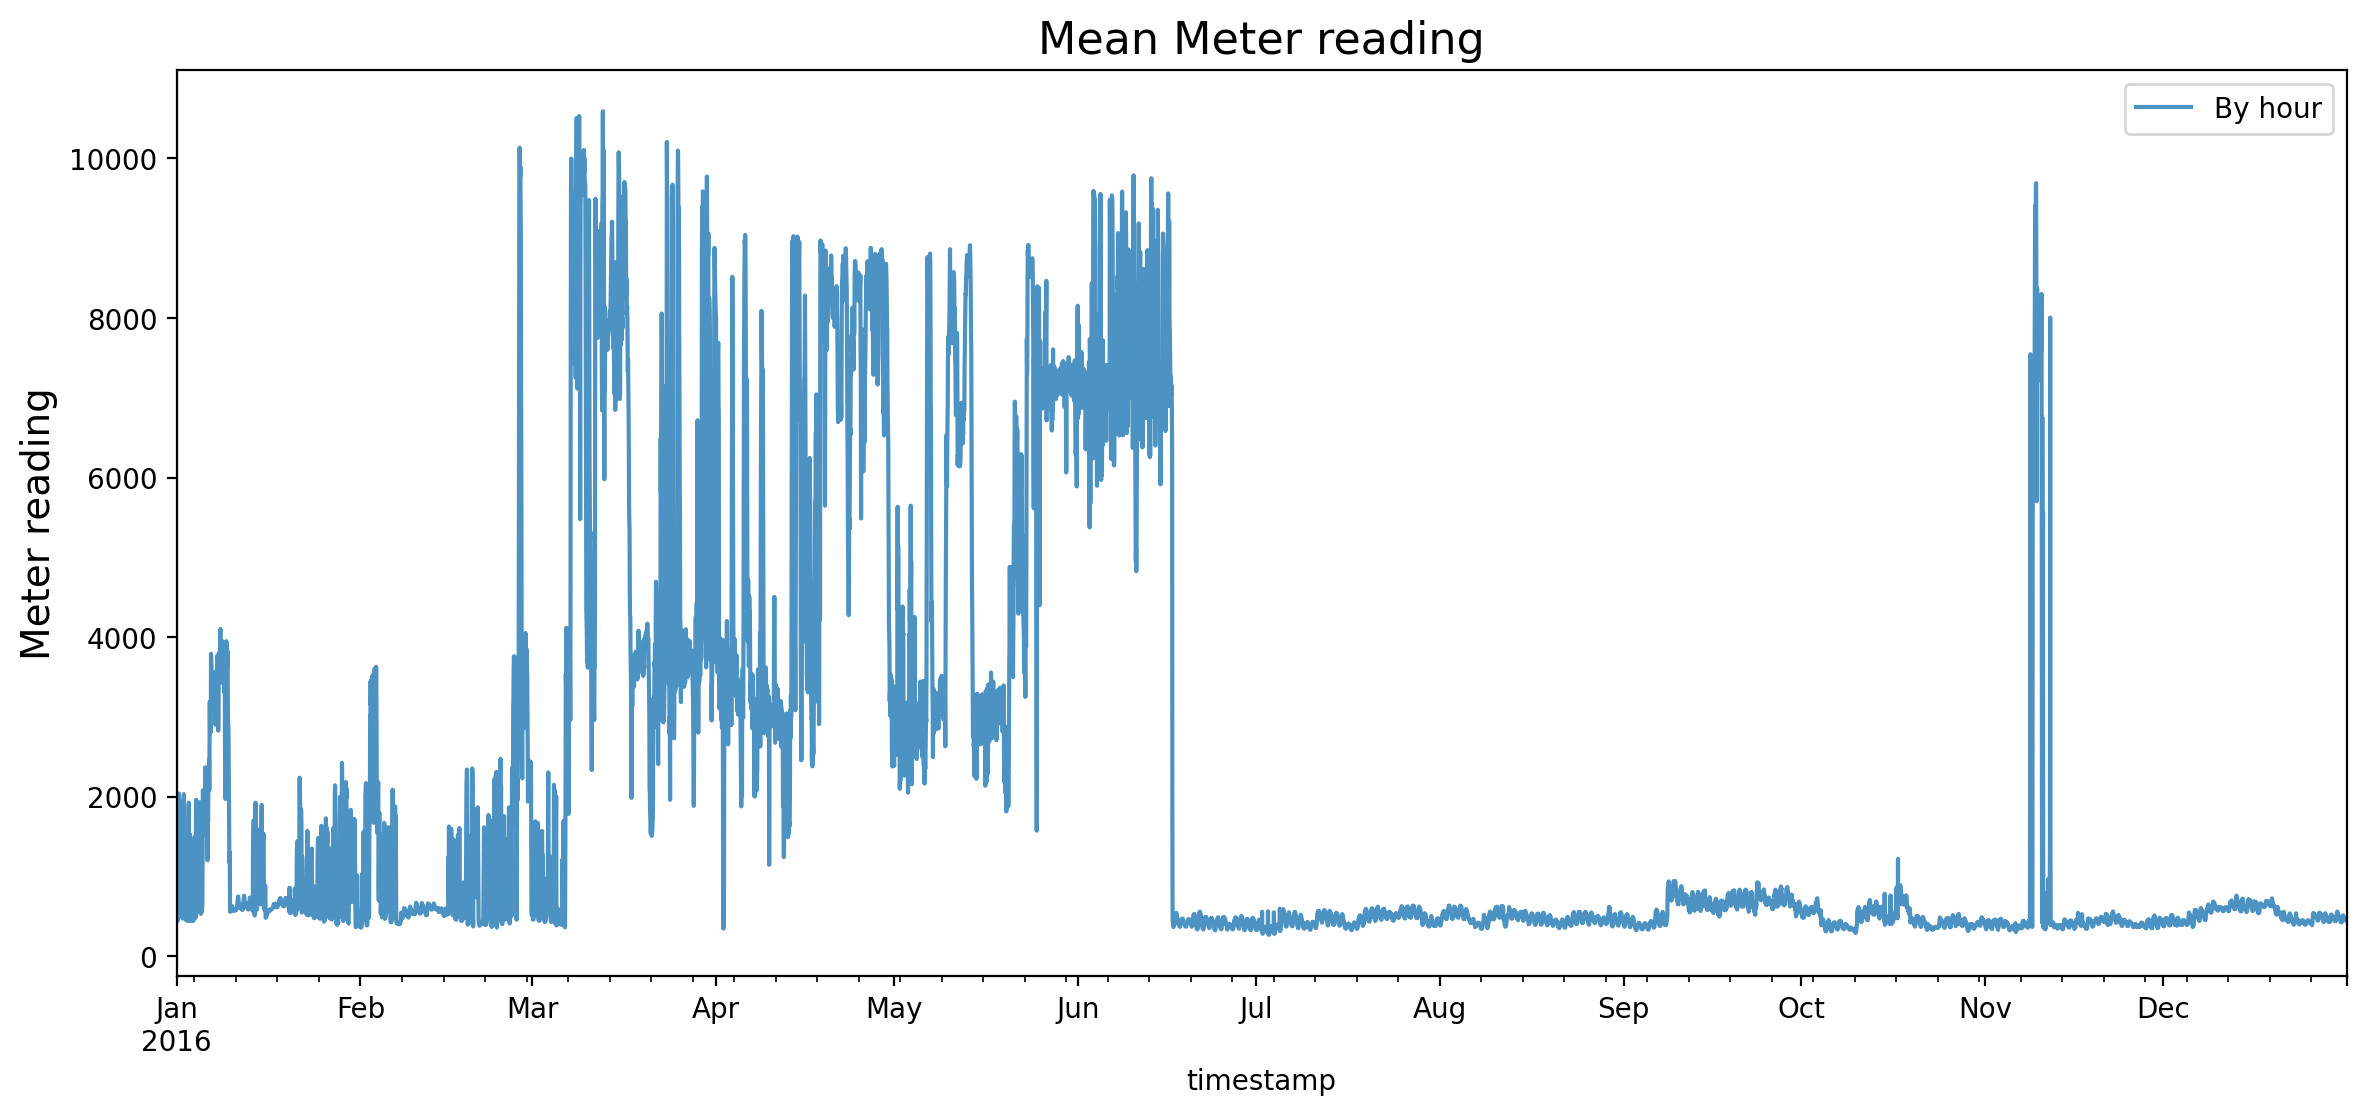

In [7]:
fig, axes = plt.subplots(1, 1, figsize=(14, 6), dpi=200)
train[['timestamp', 'meter_reading']].set_index('timestamp').resample('H').mean()['meter_reading'].plot(ax=axes, label='By hour', alpha=0.8).set_ylabel('Meter reading', fontsize=14);
axes.set_title('Mean Meter reading', fontsize=16);
axes.legend();

In [8]:
train['site_id'].nunique()

16

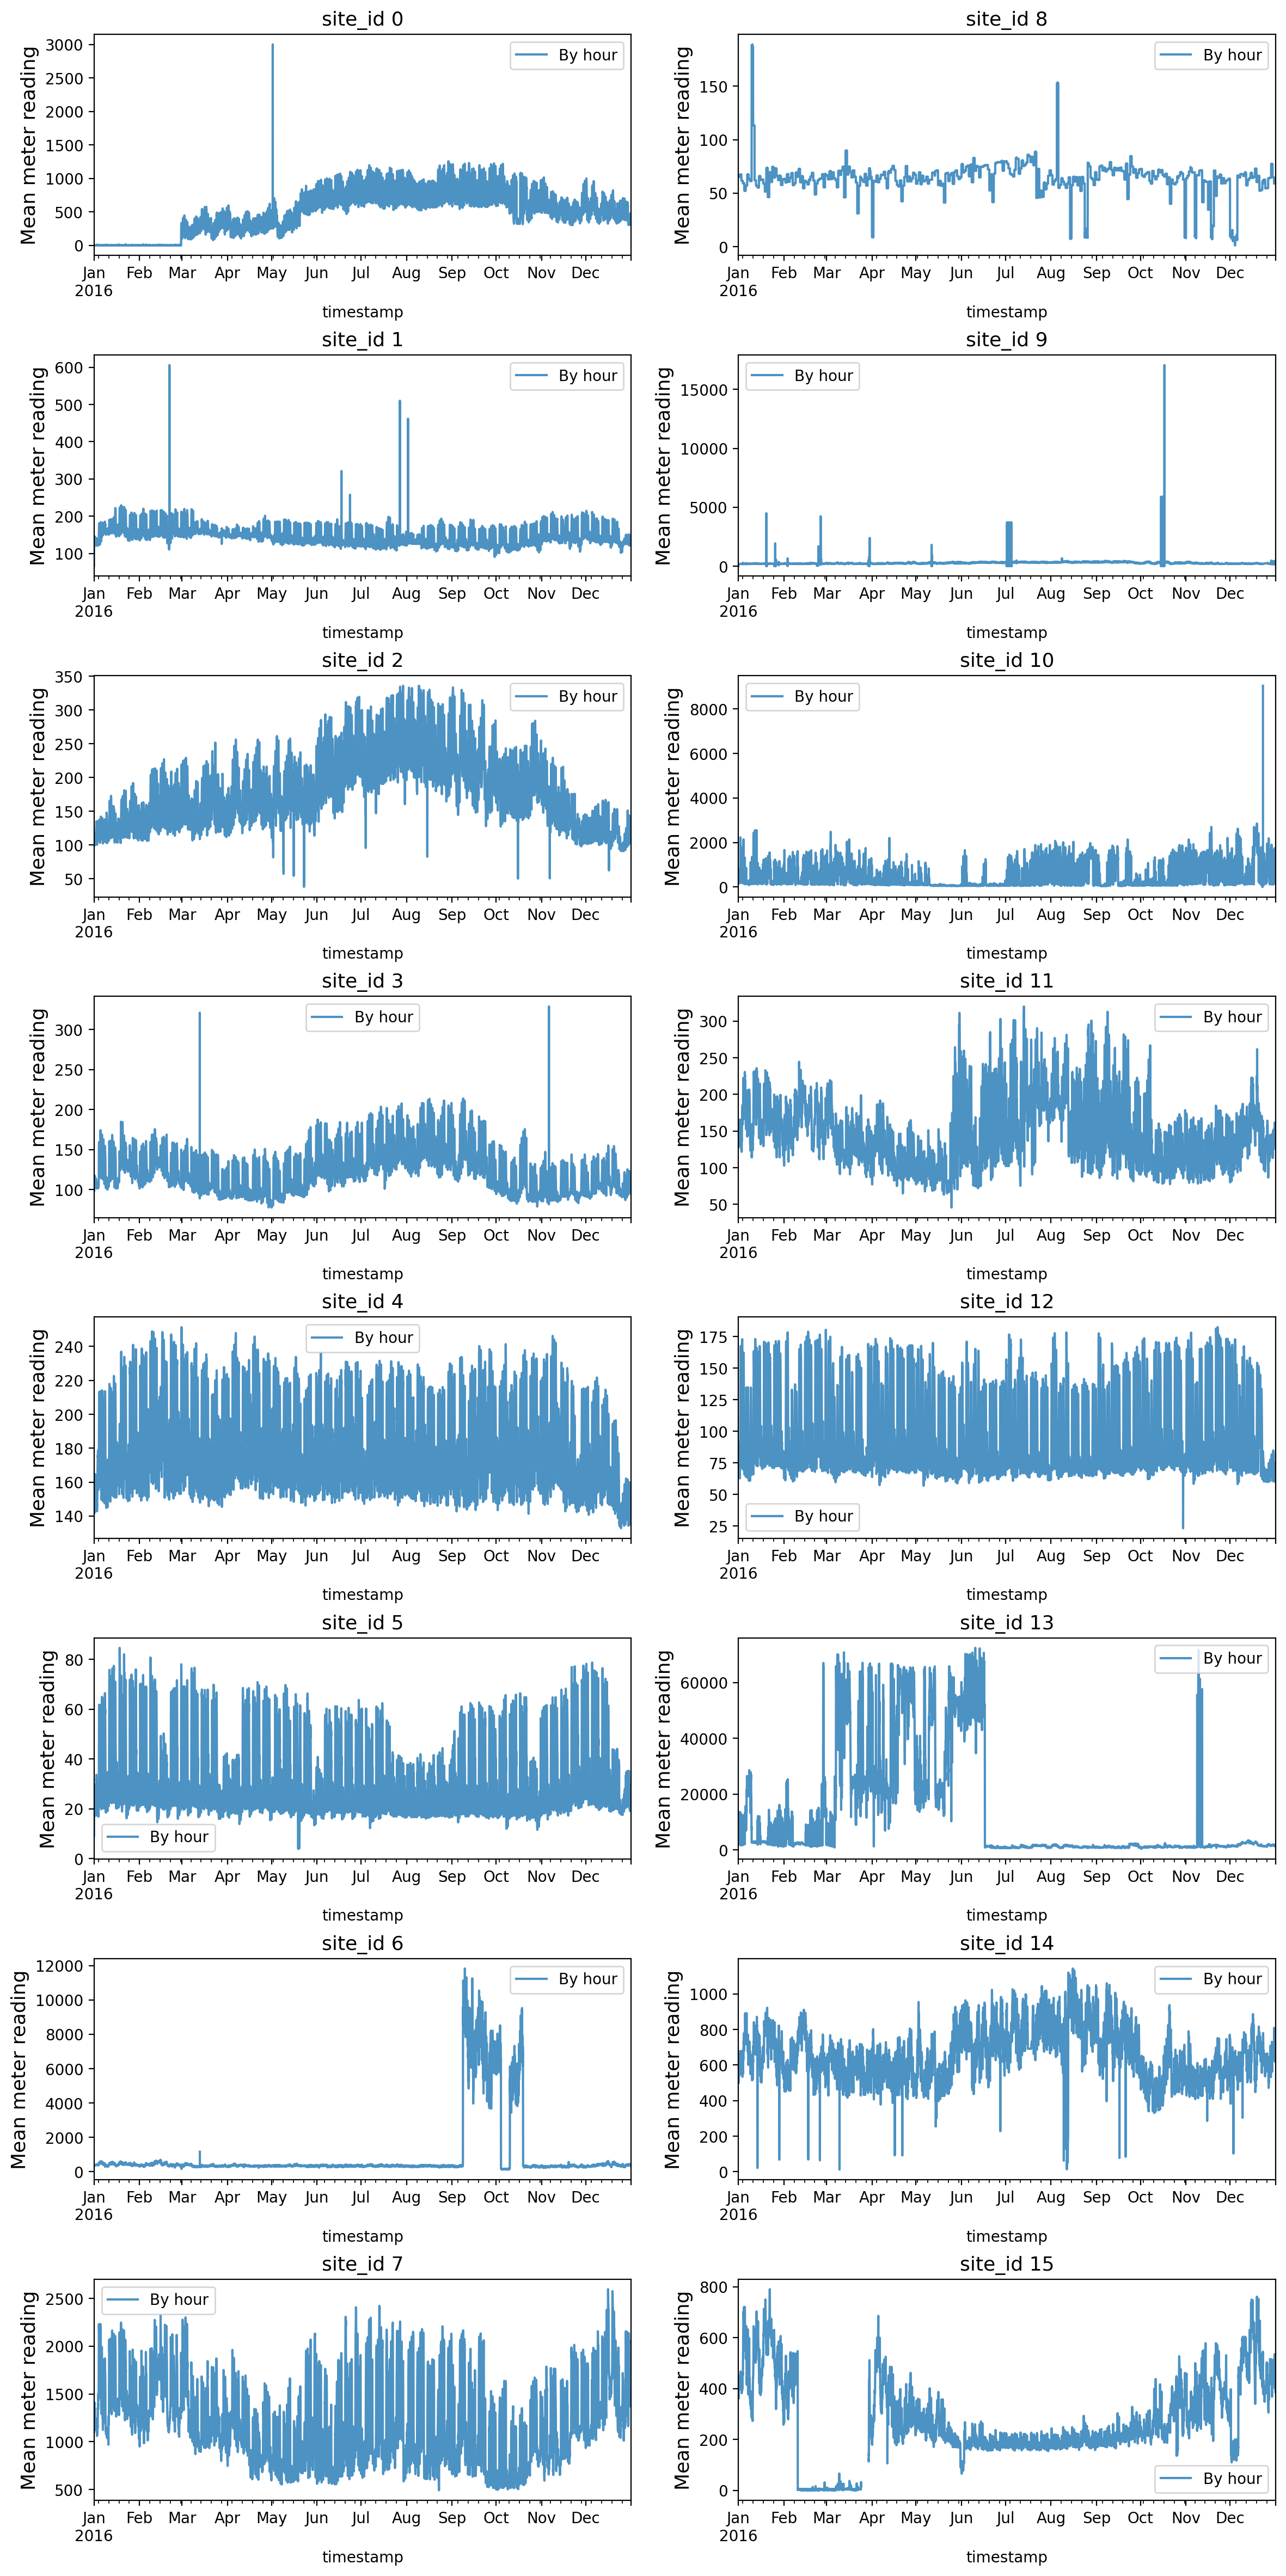

In [9]:
fig, axes = plt.subplots(8,2,figsize=(14, 30), dpi=200)
for i in range(train['site_id'].nunique()):
    train[train['site_id'] == i][['timestamp', 'meter_reading']].set_index('timestamp').resample('H').mean()['meter_reading'].plot(ax=axes[i%8][i//8], alpha=0.8, label='By hour', color='tab:blue').set_ylabel('Mean meter reading', fontsize=13);
    axes[i%8][i//8].legend();
    axes[i%8][i//8].set_title('site_id {}'.format(i), fontsize=13);
    plt.subplots_adjust(hspace=0.45)

In [10]:
for i,k in enumerate(train['primary_use'].value_counts().index):
    print(i,k)

0 Education
1 Office
2 Entertainment/public assembly
3 Lodging/residential
4 Public services
5 Healthcare
6 Other
7 Parking
8 Manufacturing/industrial
9 Food sales and service
10 Retail
11 Warehouse/storage
12 Services
13 Technology/science
14 Utility
15 Religious worship


In [11]:
import warnings
warnings.simplefilter('ignore')

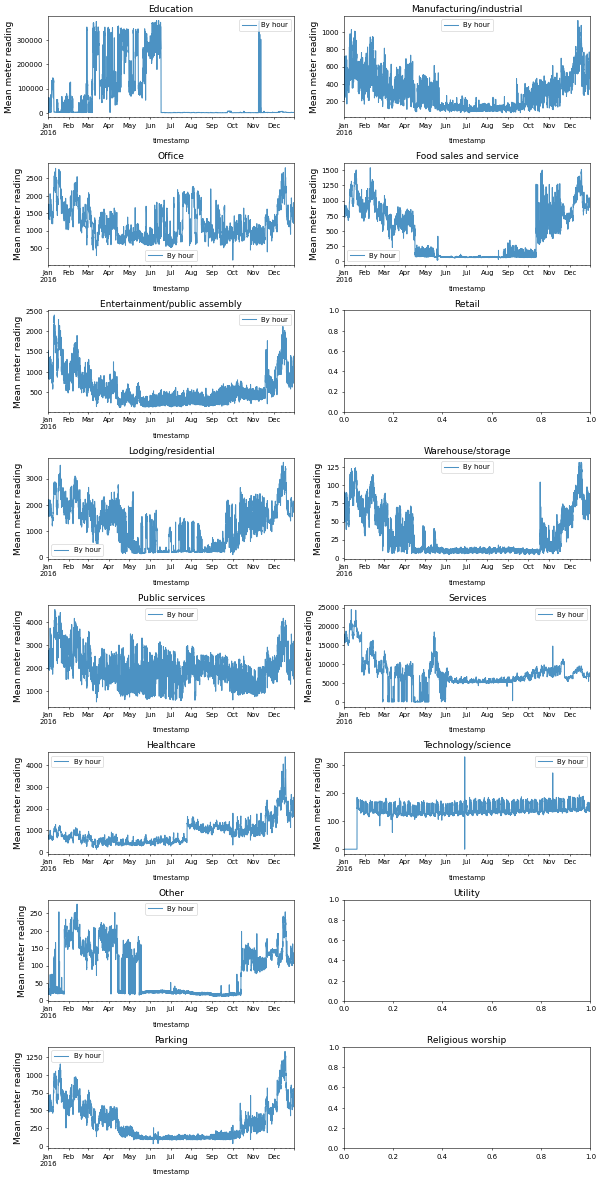

In [12]:
fig, axes = plt.subplots(8,2,figsize=(14, 30), dpi=50)
for i, use in enumerate(train['primary_use'].value_counts().index.to_list()):
    try:
        train[(train['site_id'] == 13) & (train['primary_use'] == use)][['timestamp', 'meter_reading']].set_index('timestamp').resample('H').mean()['meter_reading'].plot(ax=axes[i%8][i//8], alpha=0.8, label='By hour', color='tab:blue').set_ylabel('Mean meter reading', fontsize=13);
        axes[i%8][i//8].legend();
    except IndexError:
        pass
    axes[i%8][i//8].set_title(use, fontsize=13);
    plt.subplots_adjust(hspace=0.45)

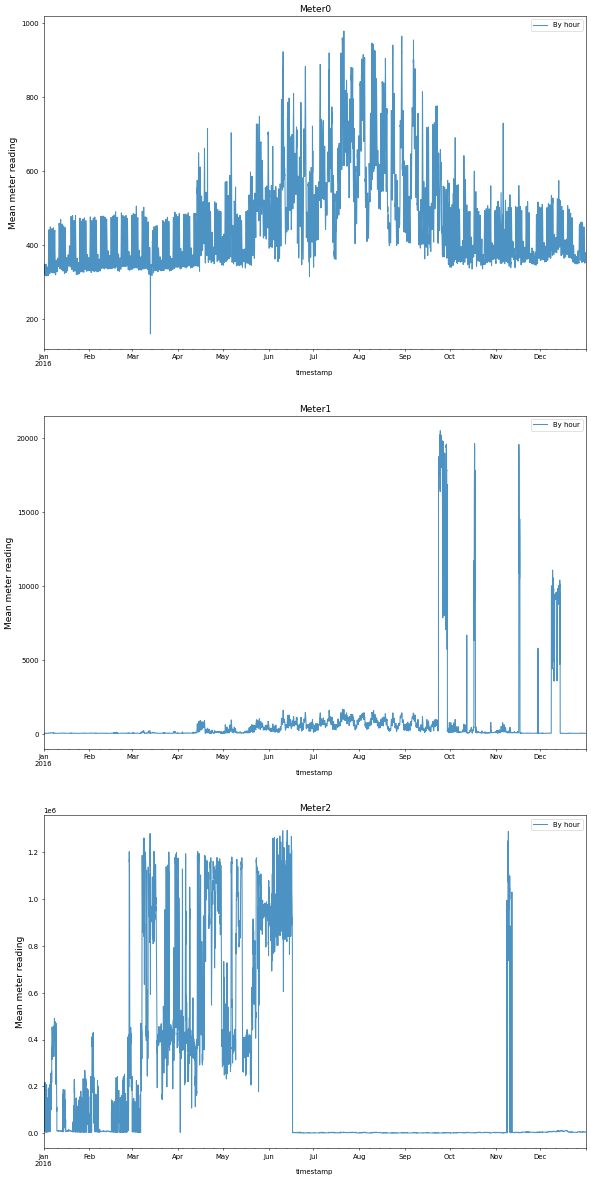

In [13]:
fig, axes = plt.subplots(3,1,figsize=(14, 30), dpi=50)
for i in train[(train['site_id'] == 13) & (train['primary_use'] == 'Education')]['meter'].value_counts().index.to_list():
    train[(train['site_id'] == 13) & (train['primary_use'] == 'Education')&(train['meter']==i)][['timestamp', 'meter_reading']].set_index('timestamp').resample('H').mean()['meter_reading'].plot(ax=axes[i], alpha=0.8, label='By hour', color='tab:blue').set_ylabel('Mean meter reading', fontsize=13);
    axes[i].legend();
    axes[i].set_title("Meter" + str(i), fontsize=13);

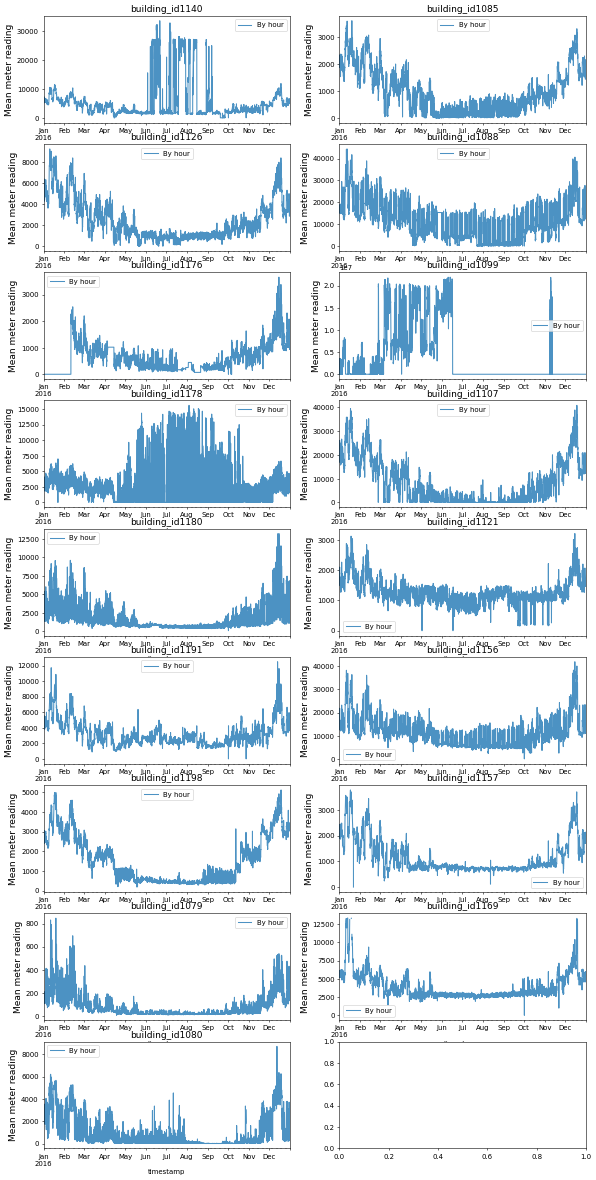

In [14]:
fig, axes = plt.subplots(9,2,figsize=(14, 30), dpi=50)
for i,k in enumerate(train[(train['site_id'] == 13) & (train['primary_use'] == 'Education')&(train['meter'] == 2)]['building_id'].value_counts().index.to_list()):
    try:
        train[(train['site_id'] == 13) & (train['primary_use'] == 'Education')&(train['meter']==2)&(train['building_id'] == k)][['timestamp', 'meter_reading']].set_index('timestamp').resample('H').mean()['meter_reading'].plot(ax=axes[i%9][i//9], alpha=0.8, label='By hour', color='tab:blue').set_ylabel('Mean meter reading', fontsize=13);
        axes[i%9][i//9].legend();
    except IndexError:
        pass
    axes[i%9][i//9].set_title('building_id' +str(k), fontsize=13);

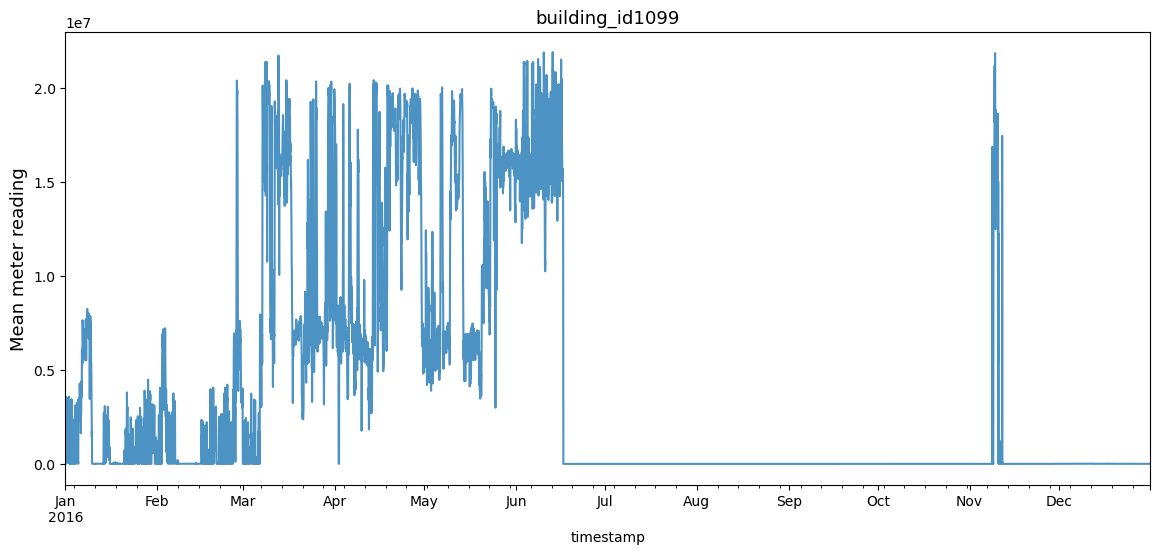

In [15]:
fig, axes = plt.subplots(1,figsize=(14, 6), dpi=100)
train[(train['site_id'] == 13) & (train['primary_use'] == 'Education')&(train['meter']==2)&(train['building_id'] == 1099)][['timestamp', 'meter_reading']].set_index('timestamp').resample('H').mean()['meter_reading'].plot(ax=axes, alpha=0.8, label='By hour', color='tab:blue').set_ylabel('Mean meter reading', fontsize=13);
axes.set_title('building_id' +str(1099), fontsize=13);

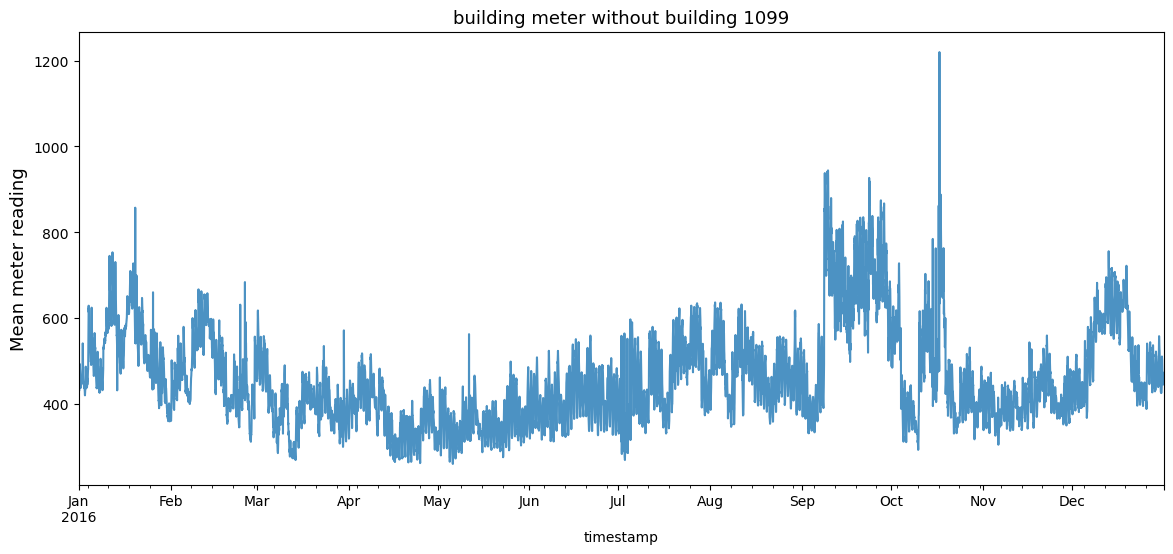

In [16]:
fig, axes = plt.subplots(1,1,figsize=(14, 6), dpi=100)
train[~((train['meter']==2)&(train['building_id'] == 1099))][['timestamp', 'meter_reading']].set_index('timestamp').resample('H').mean()['meter_reading'].plot(ax=axes, alpha=0.8, label='By hour', color='tab:blue').set_ylabel('Mean meter reading', fontsize=13);
axes.set_title('building meter without building 1099', fontsize=13);

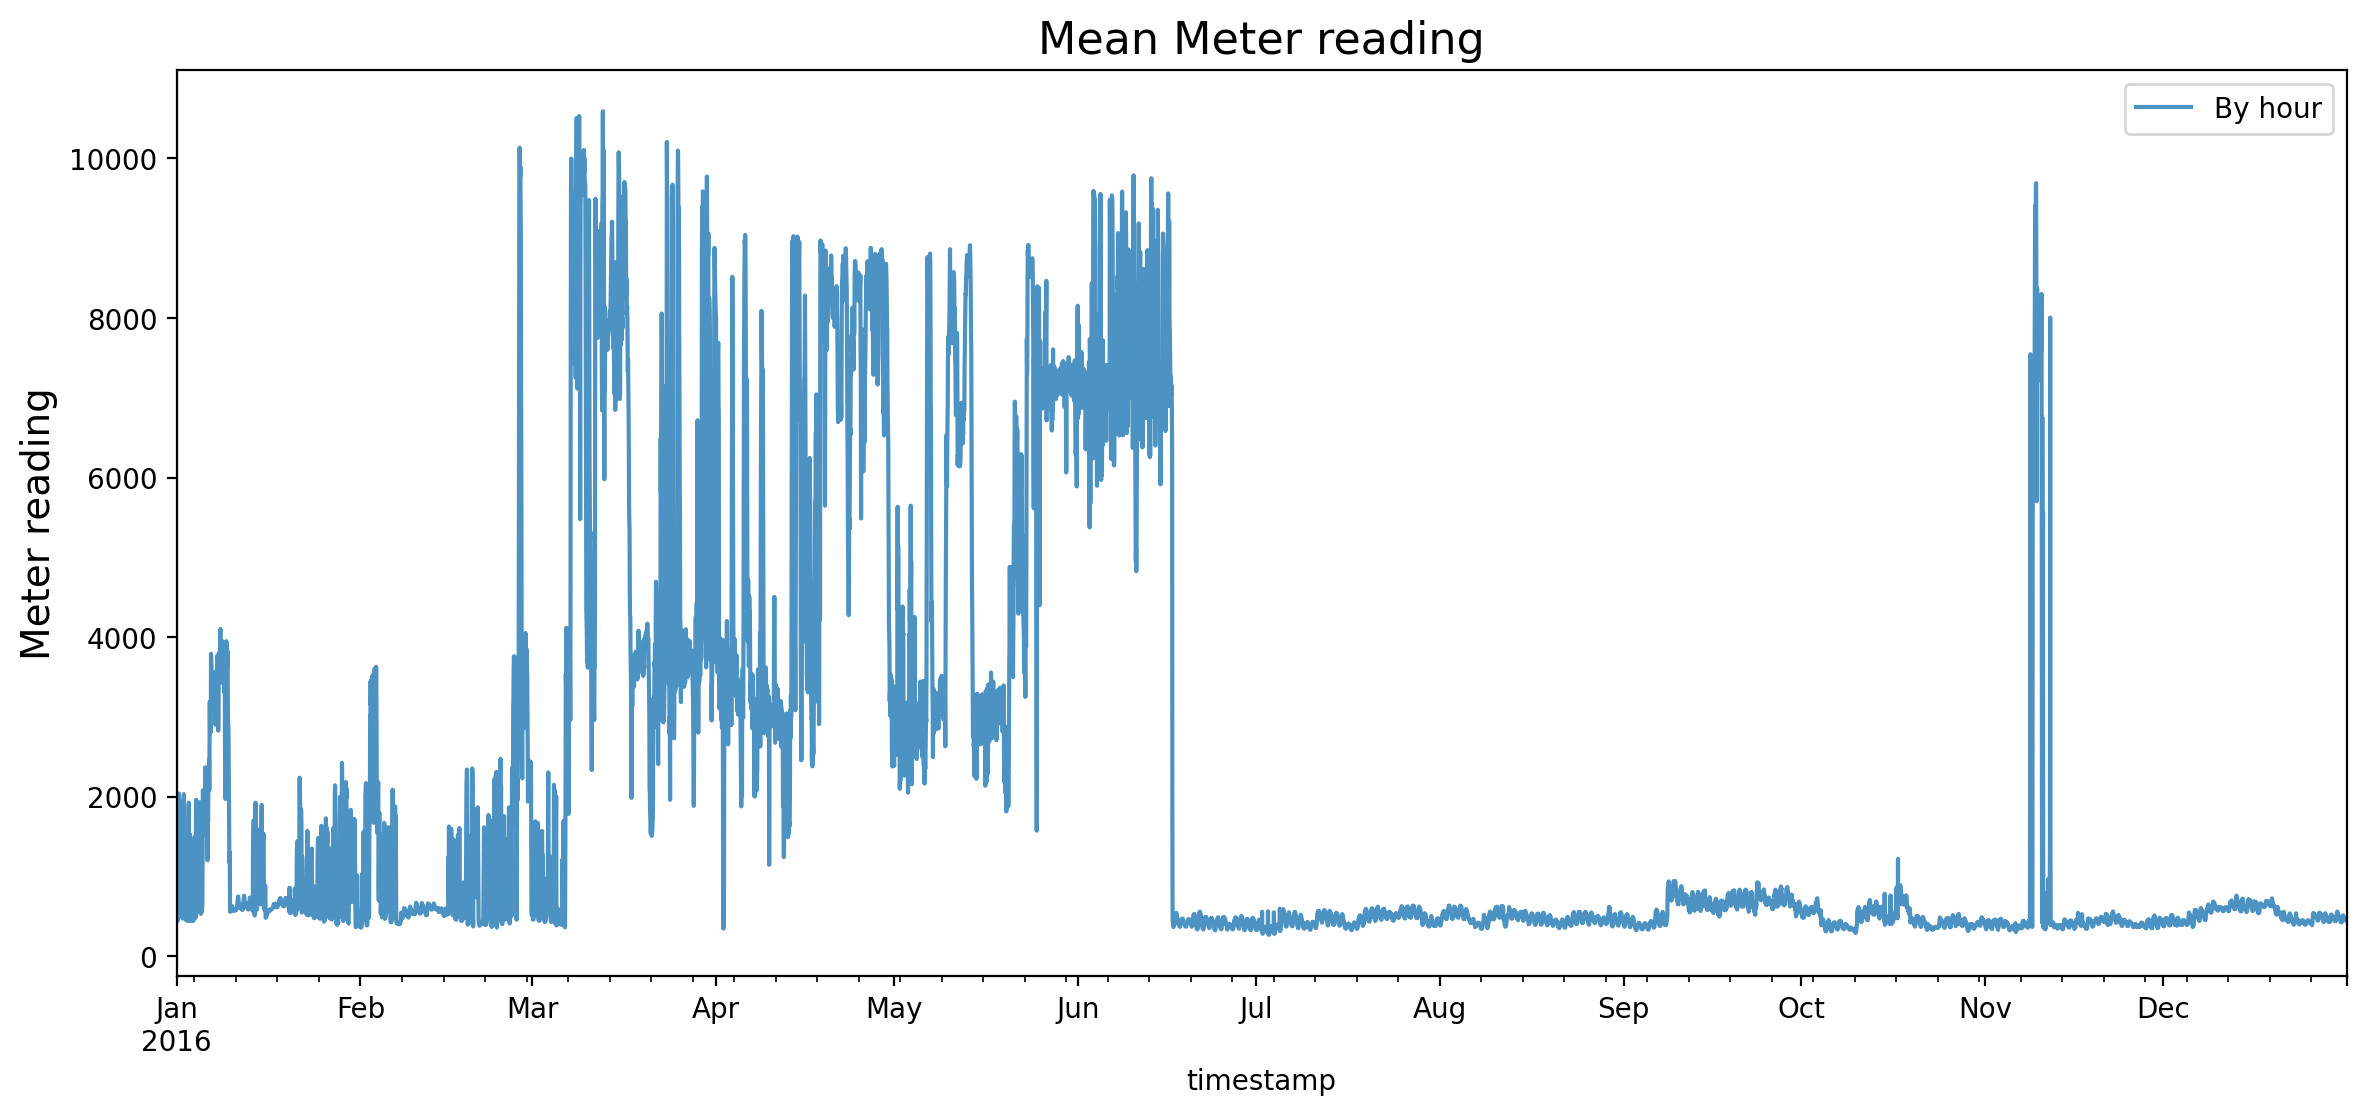

In [17]:
fig, axes = plt.subplots(1, 1, figsize=(14, 6), dpi=200)
train[['timestamp', 'meter_reading']].set_index('timestamp').resample('H').mean()['meter_reading'].plot(ax=axes, label='By hour', alpha=0.8).set_ylabel('Meter reading', fontsize=14);
axes.set_title('Mean Meter reading', fontsize=16);
axes.legend();

In [18]:
train_c = train[~((train['meter']==2)&(train['building_id'] == 1099))]

In [19]:
print(train.shape[0])
print(train.shape[0] - train_c.shape[0])

20216100
8784


In [20]:
train['primary_use'].value_counts().index.to_list()

['Education',
 'Office',
 'Entertainment/public assembly',
 'Lodging/residential',
 'Public services',
 'Healthcare',
 'Other',
 'Parking',
 'Manufacturing/industrial',
 'Food sales and service',
 'Retail',
 'Warehouse/storage',
 'Services',
 'Technology/science',
 'Utility',
 'Religious worship']

In [21]:
def meter_ana(site):
    fig, axes = plt.subplots(8,2,figsize=(14, 30), dpi=50)
    for i, use in enumerate(train['primary_use'].value_counts().index.to_list()):
        try:
            train[(train['site_id'] == site) & (train['primary_use'] == use)][['timestamp', 'meter_reading']].set_index('timestamp').resample('H').mean()['meter_reading'].plot(ax=axes[i%8][i//8], alpha=0.8, label='By hour', color='tab:blue').set_ylabel('Mean meter reading', fontsize=13);
            axes[i%8][i//8].legend();
        except IndexError:
            pass
        axes[i%8][i//8].set_title(use, fontsize=13);
        plt.subplots_adjust(hspace=0.45)

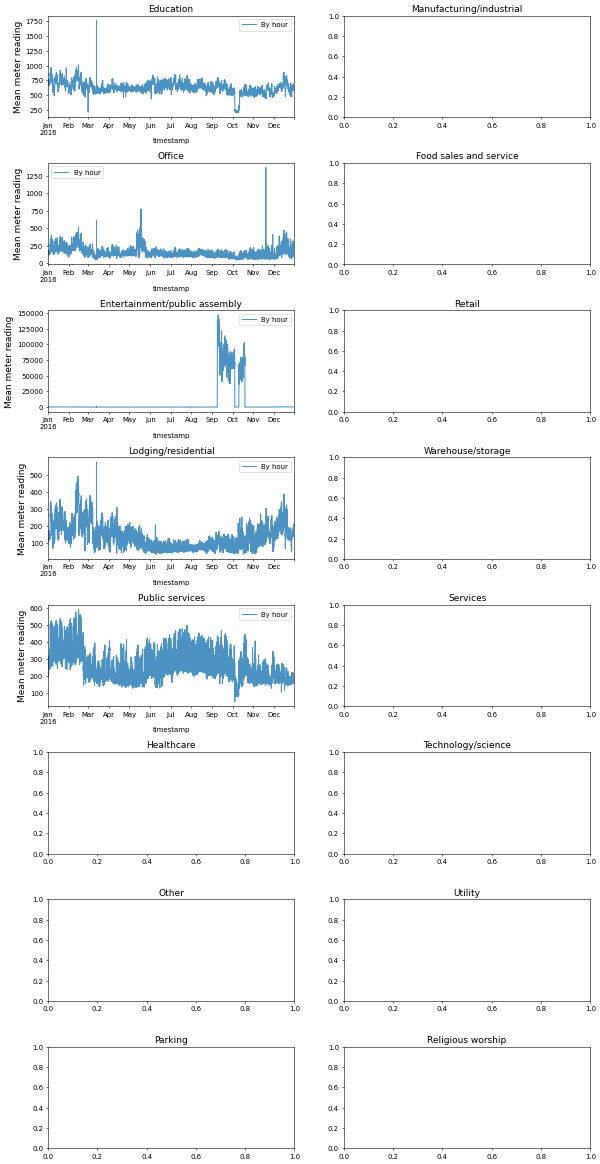

In [22]:
meter_ana(6)

In [23]:
def meter_id(site,typ):
    fig, axes = plt.subplots(5,1,figsize=(14, 30), dpi=50)
    for i in train[(train['site_id'] == site) & (train['primary_use'] == typ)]['meter'].value_counts().index.to_list():
        train[(train['site_id'] == site) & (train['primary_use'] == typ )&(train['meter']==i)][['timestamp', 'meter_reading']].set_index('timestamp').resample('H').mean()['meter_reading'].plot(ax=axes[i], alpha=0.8, label='By hour', color='tab:blue').set_ylabel('Mean meter reading', fontsize=13);
        axes[i].legend();
        axes[i].set_title("Meter" + str(i), fontsize=13);

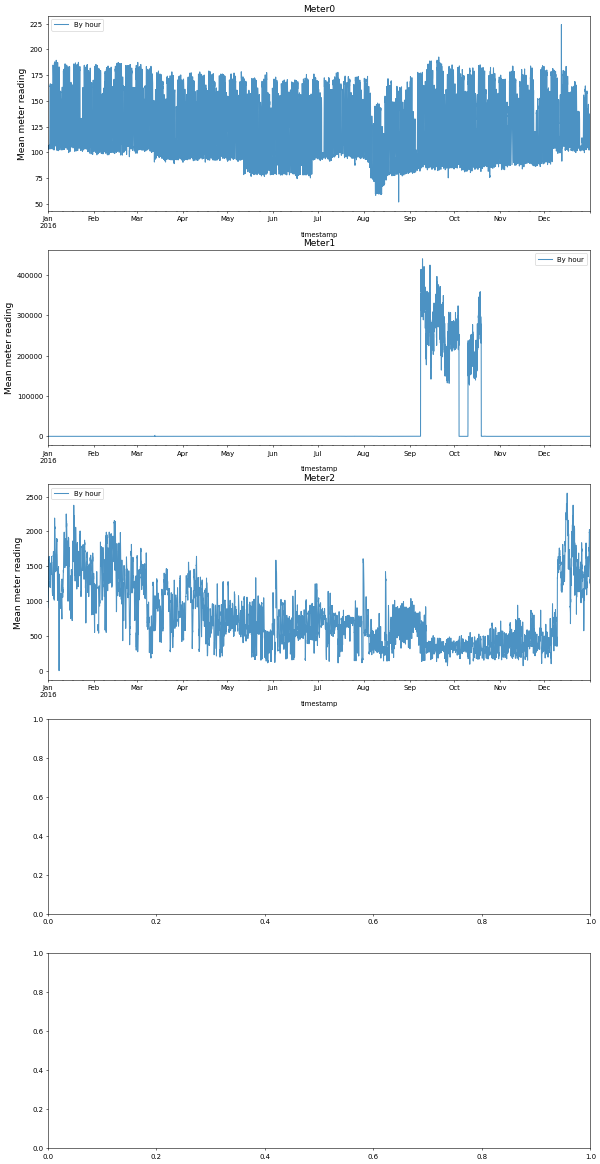

In [24]:
meter_id(6,'Entertainment/public assembly')

In [25]:
def meter_buld(site,typ,met):
    fig, axes = plt.subplots(9,2,figsize=(14, 30), dpi=100)
    for i,k in enumerate(train[(train['site_id'] == site) & (train['primary_use'] == typ)&(train['meter'] == met)]['building_id'].value_counts().index.to_list()):
        try:
            train[(train['site_id'] == site) & (train['primary_use'] == typ)&(train['meter']==met)&(train['building_id'] == k)][['timestamp', 'meter_reading']].set_index('timestamp').resample('H').mean()['meter_reading'].plot(ax=axes[i%9][i//9], alpha=0.8, label='By hour', color='tab:blue').set_ylabel('Mean meter reading', fontsize=13);
            axes[i%9][i//9].legend();
        except IndexError:
            pass
        axes[i%9][i//9].set_title('building_id' +str(k), fontsize=13);

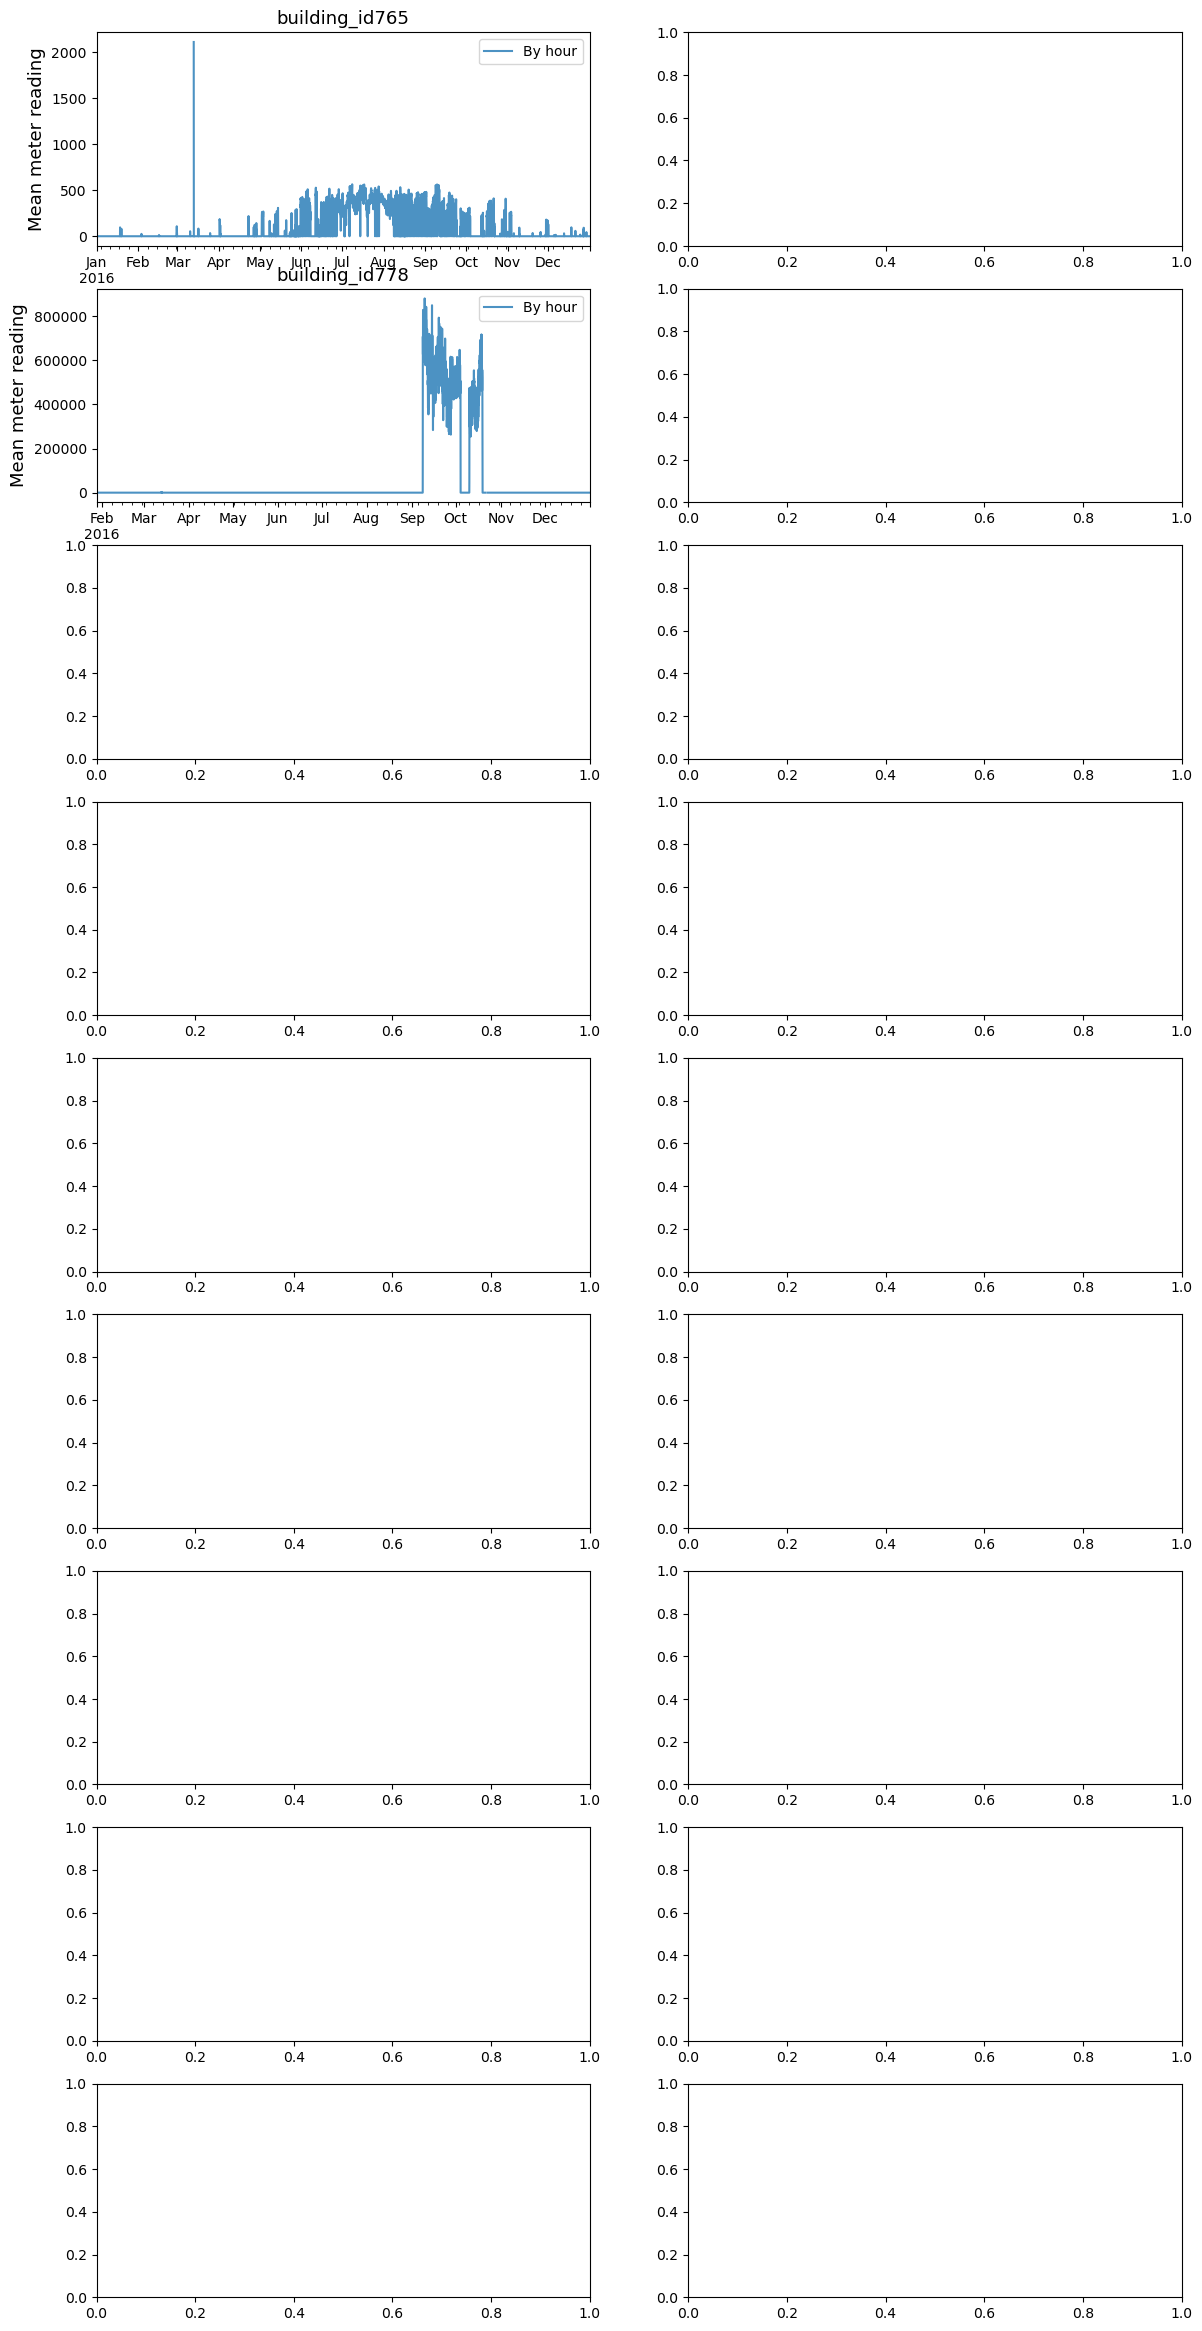

In [26]:
meter_buld(6,'Entertainment/public assembly',1)

In [27]:
def new_chart(met,buld):
    fig, axes = plt.subplots(1,1,figsize=(14, 6), dpi=100)
    train_c[~((train_c['meter']==met)&(train['building_id'] == buld))][['timestamp', 'meter_reading']].set_index('timestamp').resample('H').mean()['meter_reading'].plot(ax=axes, alpha=0.8, label='By hour', color='tab:blue').set_ylabel('Mean meter reading', fontsize=13);

In [28]:
train_c.head(1)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.700012,0.0,0.0


In [29]:
test.head(1)

,row_id,building_id,meter,timestamp,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,0,2017-01-01,0,Education,7432,2008.0,NaN,17.799999,4.0,11.7,NaN,1021.400024,100.0,3.6


In [30]:
train.describe()

,building_id,meter,meter_reading,site_id,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,8088455.0,3506933.0,2.011944e+07,11390735.0,2.011596e+07,16467077.0,1.898443e+07,18767052.0,2.007242e+07
mean,7.992780e+02,6.624412e-01,2.117121e+03,7.992232e+00,1.077830e+05,NaN,NaN,1.575020e+01,NaN,7.722728e+00,NaN,9.637975e+02,NaN,3.508670e+00
std,4.269133e+02,9.309921e-01,1.532356e+05,5.099060e+00,1.171424e+05,NaN,0.0,1.079203e+01,0.0,1.003016e+01,NaN,5.422378e+01,NaN,2.261779e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.830000e+02,1900.0,1.0,-2.890000e+01,0.0,-3.500000e+01,-1.0,9.682000e+02,0.0,0.000000e+00
25%,3.930000e+02,0.000000e+00,1.830000e+01,3.000000e+00,3.252700e+04,1951.0,1.0,8.600000e+00,0.0,0.000000e+00,0.0,1.011600e+03,70.0,2.100000e+00
50%,8.950000e+02,0.000000e+00,7.877500e+01,9.000000e+00,7.270900e+04,1969.0,3.0,1.670000e+01,0.0,8.900000e+00,0.0,1.016000e+03,180.0,3.100000e+00
75%,1.179000e+03,1.000000e+00,2.679840e+02,1.300000e+01,1.391130e+05,1993.0,6.0,2.410000e+01,4.0,1.610000e+01,0.0,1.020500e+03,280.0,4.600000e+00
max,1.448000e+03,3.000000e+00,2.190470e+07,1.500000e+01,8.750000e+05,2017.0,26.0,4.720000e+01,9.0,2.610000e+01,343.0,1.045500e+03,360.0,1.900000e+01


In [35]:
test.describe()

,row_id,building_id,meter,site_id,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,4.169760e+07,4.169760e+07,4.169760e+07,4.169760e+07,4.169760e+07,17099520.0,7253280.0,4.147570e+07,22155420.0,4.143680e+07,33896037.0,3.918077e+07,38718937.0,4.139551e+07
mean,2.084880e+07,8.075824e+02,6.642857e-01,8.086134e+00,1.069469e+05,NaN,NaN,1.305091e+01,NaN,7.491987e+00,NaN,6.236850e+02,NaN,3.143091e+00
std,1.203706e+07,4.297680e+02,9.278067e-01,5.134712e+00,1.160888e+05,NaN,0.0,1.083155e+01,0.0,1.020531e+01,NaN,3.350375e+02,NaN,2.150470e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.830000e+02,1900.0,1.0,-2.810000e+01,0.0,-3.160000e+01,-1.0,9.720000e+02,0.0,0.000000e+00
25%,1.042440e+07,4.047500e+02,0.000000e+00,3.000000e+00,3.224350e+04,1951.0,1.0,7.800000e+00,0.0,0.000000e+00,0.0,1.011500e+03,80.0,2.100000e+00
50%,2.084880e+07,9.000000e+02,0.000000e+00,9.000000e+00,7.226250e+04,1969.0,3.0,1.670000e+01,2.0,8.900000e+00,0.0,1.016000e+03,180.0,3.100000e+00
75%,3.127320e+07,1.194250e+03,1.000000e+00,1.300000e+01,1.383875e+05,1993.0,6.0,2.390000e+01,4.0,1.670000e+01,0.0,1.020600e+03,280.0,4.600000e+00
max,4.169760e+07,1.448000e+03,3.000000e+00,1.500000e+01,8.750000e+05,2017.0,26.0,4.830000e+01,9.0,2.670000e+01,597.0,1.050100e+03,360.0,2.420000e+01


In [36]:
def distplot(variable, color):
    global ax
    font_size = 16
    title_size = 20
    plt.rcParams['figure.figsize'] = (18, 10)
    ax = sns.distplot(variable, color = color)
    plt.xlabel('%s' %variable.name, fontsize = font_size)
    plt.ylabel('Count ', fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.title(' Distribution of '+'%s' %variable.name, fontsize = title_size)
    plt.show()

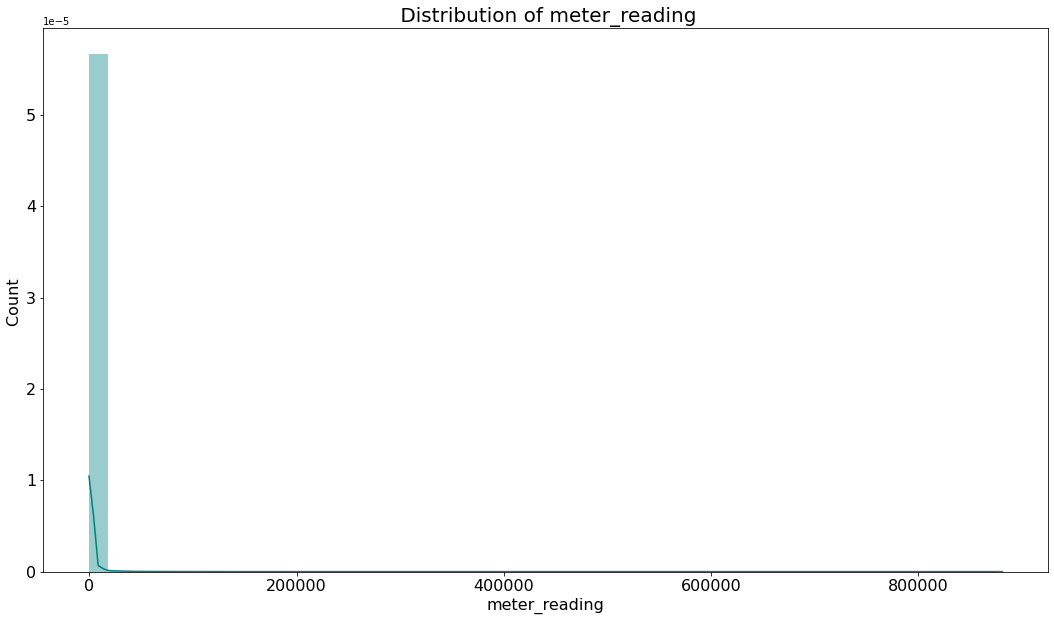

In [37]:
distplot(train_c['meter_reading'], 'teal')

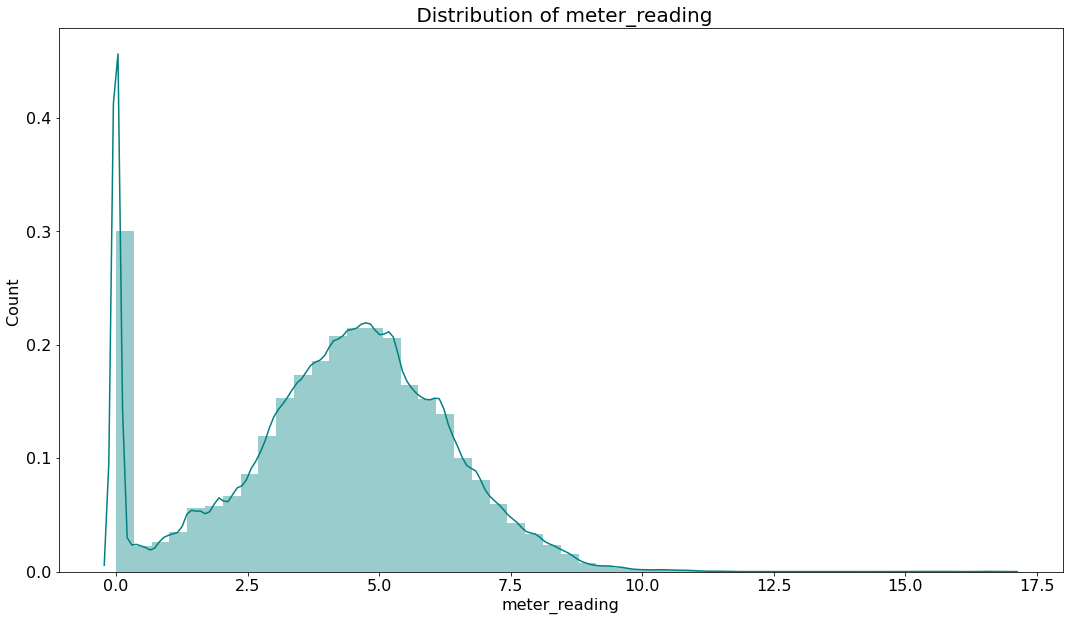

In [38]:
train_c['meter_reading'] = np.log1p(train_c['meter_reading'])
distplot(train['meter_reading'], 'teal')

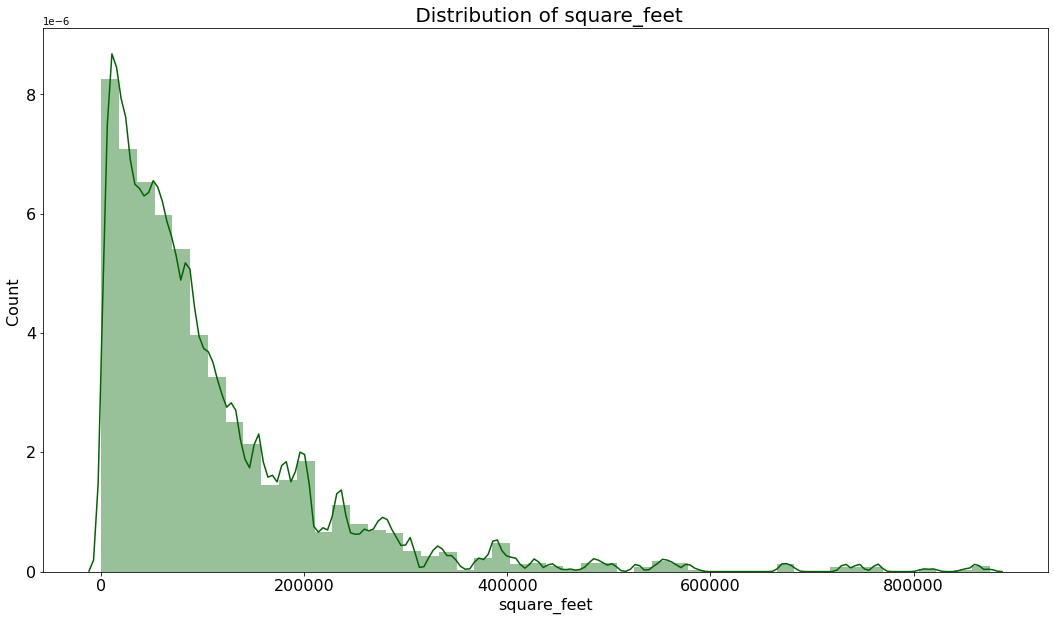

In [39]:
distplot(train_c['square_feet'], 'darkgreen')

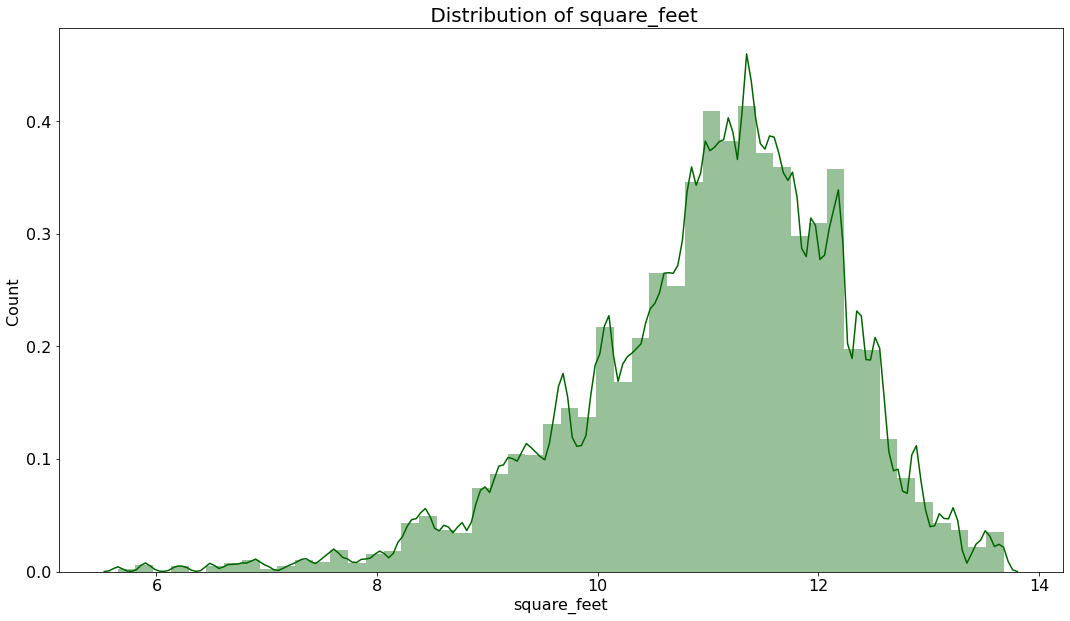

In [40]:
train_c['square_feet'] = np.log1p(train_c['square_feet'])
test['square_feet'] = np.log1p(test['square_feet'])

distplot(train_c['square_feet'], 'darkgreen')

# Corelation table

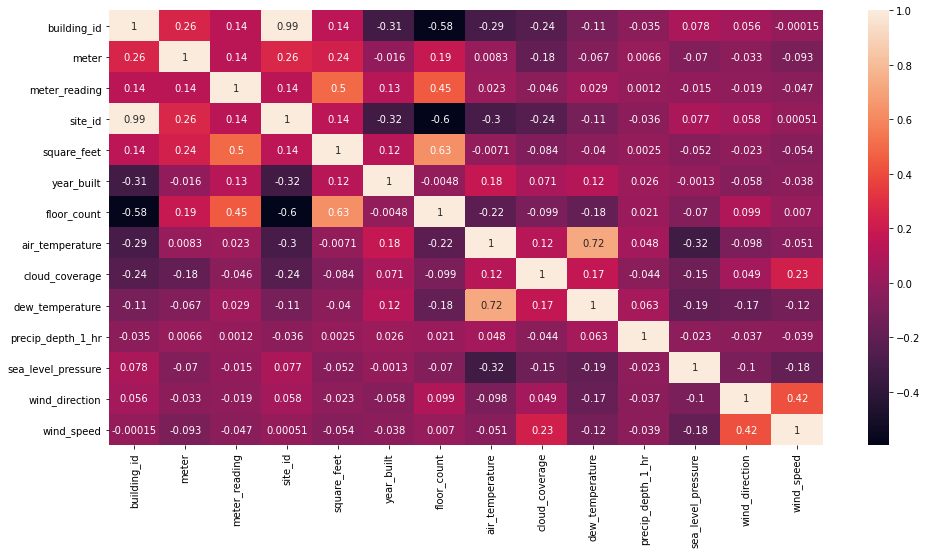

In [41]:
fig, ax = plt.subplots(figsize=(16,8))
corr = train[[col for col in train.columns if col != 'year']].sample(100100).corr(method='spearman')
_ = sns.heatmap(corr, annot=True,
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values)

# Missing value filling

In [42]:
median_var_train = train_c.loc[:, ['floor_count','air_temperature','cloud_coverage','dew_temperature','precip_depth_1_hr','sea_level_pressure','wind_direction','wind_speed']]
for i in median_var_train.columns:
    train_c[i].fillna(train_c[i].median(), inplace = True)

median_var_test = test.loc[:, ['floor_count','air_temperature','cloud_coverage','dew_temperature','precip_depth_1_hr','sea_level_pressure','wind_direction','wind_speed']]
for i in median_var_test.columns:
    test[i].fillna(test[i].median(), inplace = True)

In [43]:
print(train_c.isna().sum())

building_id                  0
meter                        0
timestamp                    0
meter_reading                0
site_id                      0
primary_use                  0
square_feet                  0
year_built            12118861
floor_count                  0
air_temperature              0
cloud_coverage               0
dew_temperature              0
precip_depth_1_hr            0
sea_level_pressure           0
wind_direction               0
wind_speed                   0
dtype: int64


In [44]:
print(test.isna().sum())

row_id                       0
building_id                  0
meter                        0
timestamp                    0
site_id                      0
primary_use                  0
square_feet                  0
year_built            24598080
floor_count                  0
air_temperature              0
cloud_coverage               0
dew_temperature              0
precip_depth_1_hr            0
sea_level_pressure           0
wind_direction               0
wind_speed                   0
dtype: int64


In [45]:
train_c = train_c.drop(columns = ['year_built','floor_count'])
test = test.drop(columns =['year_built','floor_count'] )

In [46]:
print(train_c.isna().sum())

building_id           0
meter                 0
timestamp             0
meter_reading         0
site_id               0
primary_use           0
square_feet           0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
dtype: int64


In [47]:
print(test.isna().sum())

row_id                0
building_id           0
meter                 0
timestamp             0
site_id               0
primary_use           0
square_feet           0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
dtype: int64


# One Hot Encoding and Dummies

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_c['primary_use'] = le.fit_transform(train_c['primary_use'])
test['primary_use'] = le.fit_transform(test['primary_use'])

In [49]:
one_hot_train = pd.get_dummies(train_c['meter'])
one_hot_test = pd.get_dummies(test['meter'])

In [50]:
one_hot_train = one_hot_train.rename(columns={0:"Electricity",1:'ChilledWater',2:'Steam',3:'HotWater'})
one_hot_test = one_hot_test.rename(columns={0:"Electricity",1:'ChilledWater',2:'Steam',3:'HotWater'})

In [51]:
train_c["timestamp"] = pd.to_datetime(train_c["timestamp"])
train_c["hour"] = np.uint8(train_c["timestamp"].dt.hour)
train_c["day"] = np.uint8(train_c["timestamp"].dt.day)
train_c["weekday"] = np.uint8(train_c["timestamp"].dt.weekday)
train_c["month"] = np.uint8(train_c["timestamp"].dt.month)

test["timestamp"] = pd.to_datetime(test["timestamp"])
test["hour"] = np.uint8(test["timestamp"].dt.hour)
test["day"] = np.uint8(test["timestamp"].dt.day)
test["weekday"] = np.uint8(test["timestamp"].dt.weekday)
test["month"] = np.uint8(test["timestamp"].dt.month)

In [52]:
train_c.drop(columns =['meter','timestamp'],axis = 1, inplace = True)
test.drop(columns =['meter','timestamp'],axis = 1, inplace = True )

In [53]:
train_finally = pd.concat([one_hot_train, train_c], axis = 1)
test_finally = pd.concat([one_hot_test, test], axis = 1)

# Saving 

In [54]:
compression_opts1 = dict(method='zip',archive_name='train_finally.csv') 
train_finally.to_csv('train_finally.zip', index=False,compression=compression_opts1)
compression_opts2 = dict(method='zip',archive_name='test_finally.csv') 
test_finally.to_csv('test_finally.zip', index=False,compression=compression_opts2)